## Caso Titanic

Por `'Carlos Melo` [Titanic](http://sigmoidal.ai/data-science-titanic-python-1/)

1ª dica: Estruture sempre seu projeto se baseando em um framework ou checklist, com isso teremos: <br>
1. Definição do Problema - Entendendo o negócio
1. Obtenção dos Dados - Quais serão necessários para fazer as análises
1. Exploração dos Dados - Estudar os atributos para encontrar as características
1. Preparação dos Dados
1. Modelagem
1. Avaliação

***3 - Montando o dicionário dos dados - Fase de exploração***
>- **PassengerId:** Número de identificação do passageiro
- **Survived:** Informa se o passageiro sobreviveu ao desastre
    - 0 = Não
    - 1 = Sim
- **Pclass:** Classe do bilhete
    - 1 = 1ª Classe
    - 2 = 2ª Classe
    - 3 = 3ª Classe
- **Name:** Nome do passageiro
- **Sex:** Sexo do passageiro
- **Age:** Idade do passageiro
- **SibSp:** Quantidade de cônjuges e irmãos a bordo
- **Parch:** Quantidade de pais e filhos a bordo
- **Ticket:** Número da passagem
- **Fare:** Preço da Passagem
- **Cabin:** Número da cabine do passageiro
- **Embarked:** Porto no qual o passageiro embarcou
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

Utilizando o pandas_profiling para auxiliar na exploração dos dados

In [62]:
import pandas_profiling as pdp
pdp.ProfileReport(train)

*Quais os tipos de cada variável?*

In [6]:
# Identificando o tipo das colunas
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

*Qual a porcentagem dos valores faltantes*

In [10]:
# Consultar valores faltantes
(train.isnull().sum() / train.shape[0]).sort_values(ascending = False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

*Como é a distribuição estatística dos dados?*

In [11]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002628C67D940>,
      dtype=object)

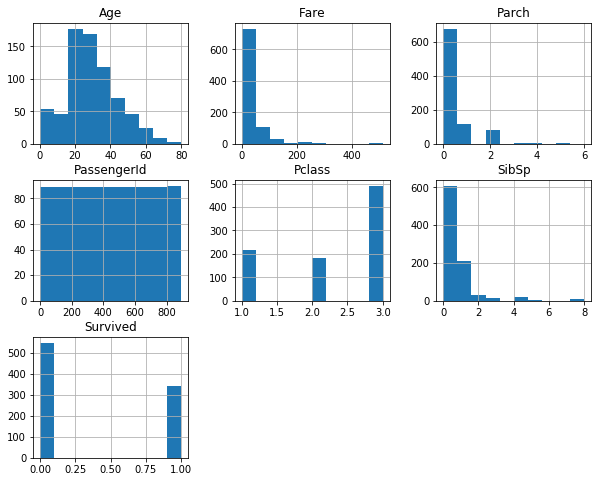

In [18]:
train.hist(figsize=(10,8))

*Quais grupos de pessoas tinham mais chances de sobrevivência?*

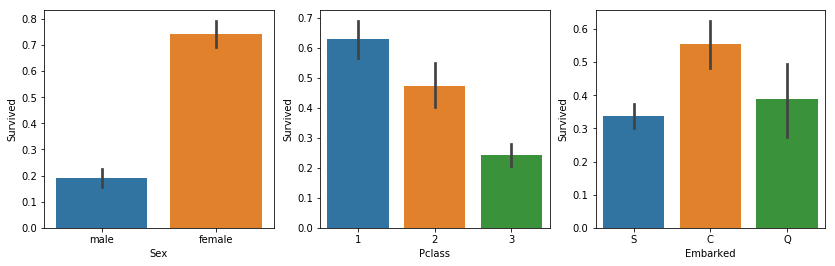

In [40]:
# Gráfico de Survived x Sex, Pclass e Embarked
fig, ax = plt.subplots(1, 3, figsize=(14,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=ax[0])
sns.barplot(x='Pclass', y='Survived', data=train, ax=ax[1])
sns.barplot(x='Embarked', y='Survived', data=train, ax=ax[2])

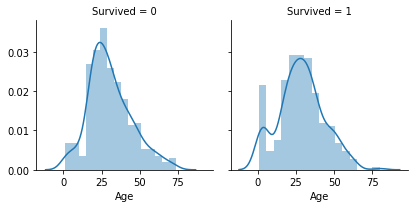

In [58]:
# Influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002629D4B3048>,
      dtype=object)

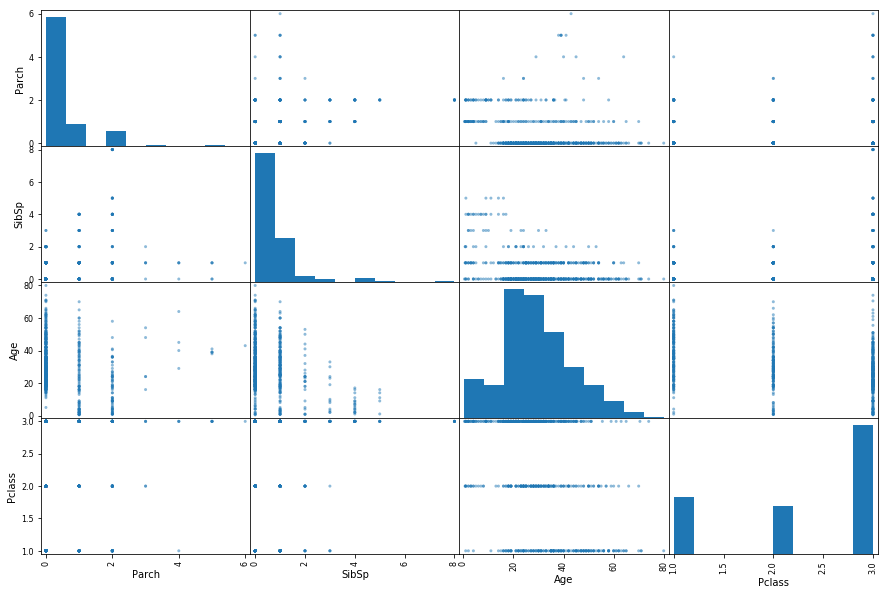

In [60]:
# Plotando o scatter matrix
columns = ['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15,10))

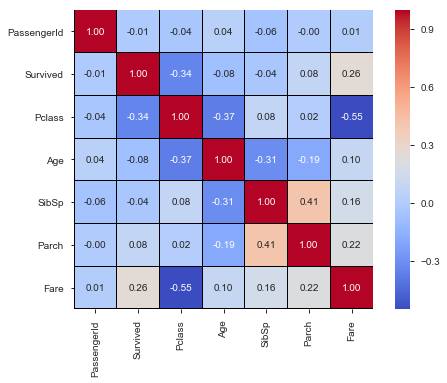

In [82]:
# plotando o heatmap para as variáveis numéricas
sns.heatmap(train.corr(), # Inserindo a correlação
            cmap='coolwarm', # Alterando a cor do gráfico
            fmt='.2f', # Incerindo duas casas decimais na anotação
            linewidths=0.1, # Alterando o tamanho das linhas
            square=True, # Setando as células para serem todas um quadrado do mesmo tamanho
            linecolor='black', # Alterando a cor das linhas
            annot=True # Inserindo a anotação numérica no gráfico
           )